# Data Visualization

# Imports

In [33]:
import brunel
import math
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read in Dataframe from Data Preparation Step

In [34]:
# Verify read
loan_df = pd.read_pickle("01-dataprep-loan_short_df.pkl")


In [35]:
loan_df.head(5)

id addr_state  annual_inc  collections_12_mths_ex_med  delinq_2yrs  \
0  10159548         FL     63000.0                         0.0          0.0   
1  10127816         MI    100000.0                         0.0          0.0   
2  10139658         NM     40000.0                         0.0          0.0   
3  10129477         NC     88000.0                         0.0          1.0   
4  10119623         CO    130000.0                         0.0          0.0   

                                                desc    dti emp_length  \
0    Borrower added on 12/31/13 > To pay Home Dep...  16.51    2 years   
1    Borrower added on 12/31/13 > pay off my othe...  22.18  10+ years   
2                                                  0  16.94  10+ years   
3                                                  0  10.02    4 years   
4                                                  0  13.03  10+ years   

                              emp_title  fico_range_high  fico_range_low  \
0         aircraft maintenance engineer            674.0           670.0   
1                                driver            664.0           660.0   
2                       On road manager            664.0           660.0   
3  Assistant Director - Human Resources            674.0           670.0   
4                                   LTC            719.0           715.0   

   funded_amnt  funded_amnt_inv grade home_ownership  inq_last_6mths  \
0      15000.0          15000.0     A       MORTGAGE             0.0   
1      24000.0          24000.0     B       MORTGAGE             0.0   
2      12000.0          12000.0     B           RENT             0.0   
3      14000.0          14000.0     B           RENT             0.0   
4      12000.0          12000.0     B       MORTGAGE             1.0   

   installment int_rate    issue_d  loan_amnt loan_status  open_acc  \
0       476.30    8.90% 2013-12-01    15000.0  Fully Paid       8.0   
1       814.80   13.53% 2013-12-01    24000.0  Fully Paid      14.0   
2       407.40   13.53% 2013-12-01    12000.0  Fully Paid       7.0   
3       470.71   12.85% 2013-12-01    14000.0  Fully Paid       6.0   
4       398.52   11.99% 2013-12-01    12000.0  Fully Paid       9.0   

              purpose pymnt_plan  revol_bal revol_util sub_grade        term  \
0  debt_consolidation          n    11431.0      74.2%        A5   36 months   
1         credit_card          n    21617.0      76.7%        B5   36 months   
2  debt_consolidation          n     5572.0      68.8%        B5   36 months   
3  debt_consolidation          n     3686.0      81.9%        B4   36 months   
4  debt_consolidation          n    10805.0        67%        B3   36 months   

   total_acc   total_pymnt verification_status zip_code  acc_now_delinq  \
0       29.0  17146.725104        Not Verified    334xx             0.0   
1       39.0  28652.210000            Verified    493xx             0.0   
2       32.0  13359.776858     Source Verified    871xx             0.0   
3       14.0  16945.318783        Not Verified    282xx             0.0   
4       19.0  14346.479050     Source Verified    809xx             0.0   

   acc_open_past_24mths application_type  avg_cur_bal  bc_open_to_buy  \
0                   3.0       Individual      38927.0          2969.0   
1                   7.0       Individual      15372.0          4822.0   
2                   4.0       Individual       2268.0          1428.0   
3                   3.0       Individual       2945.0           480.0   
4                   4.0       Individual      36362.0          3567.0   

   bc_util  chargeoff_within_12_mths  collection_recovery_fee  \
0     79.1                       0.0                      0.0   
1     77.6                       0.0                      0.0   
2     79.6                       0.0                      0.0   
3     87.7                       0.0                      0.0   
4     93.0                       0.0                      0.0   

  debt_set

# Exploratory Data Analysis

In this section, we will draw some visualizations using the brunel library to further explore the dataset.

* The Growth of Lending Club
* Outcome Variable: Loan Status
* Who Borrowed Most of the Money?
* Default Rate By State
* Loan Purpose
* Credit History(DELING_EVER)
* DTI

### Plot Histograms of Columns

skipping column id of type  object
skipping column addr_state of type  object
skipping column desc of type  object
skipping column emp_length of type  object
skipping column emp_title of type  object
skipping column grade of type  object
skipping column home_ownership of type  object
skipping column int_rate of type  object
skipping column issue_d of type  datetime64[ns]
skipping column loan_status of type  object
skipping column purpose of type  object
skipping column pymnt_plan of type  object
skipping column revol_util of type  object
skipping column sub_grade of type  object
skipping column term of type  object
skipping column verification_status of type  object
skipping column zip_code of type  object
skipping column application_type of type  object
skipping column debt_settlement_flag of type  object
skipping column debt_settlement_flag_date of type  object
skipping column disbursement_method of type  object
skipping column earliest_cr_line of type  datetime64[ns]
skipping column

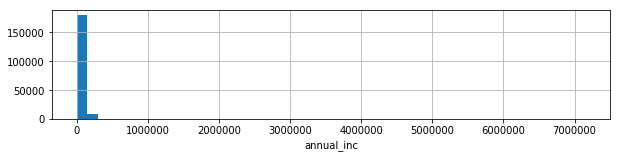

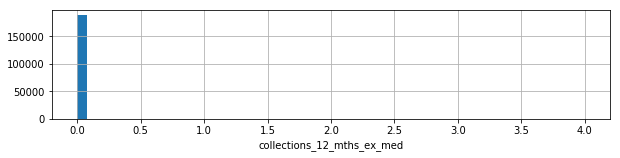

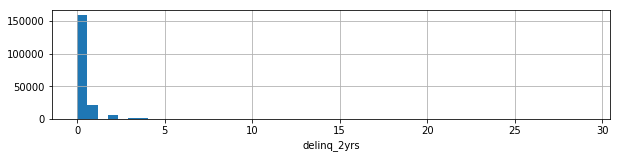

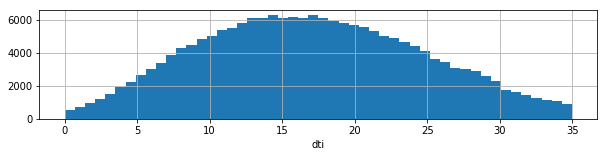

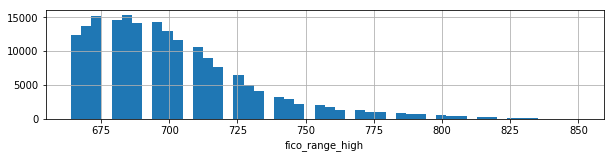

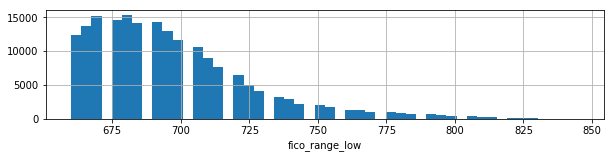

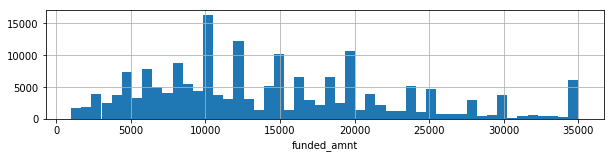

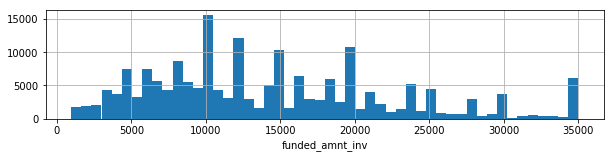

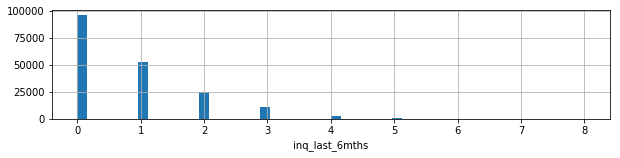

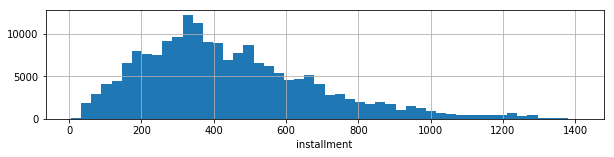

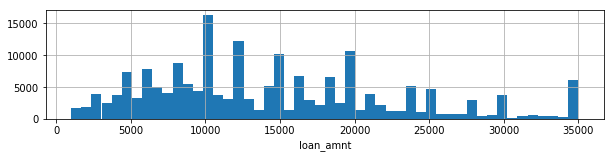

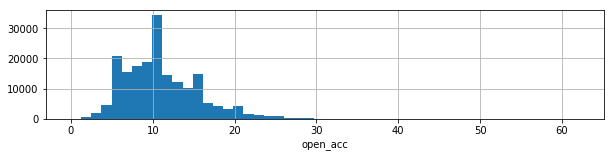

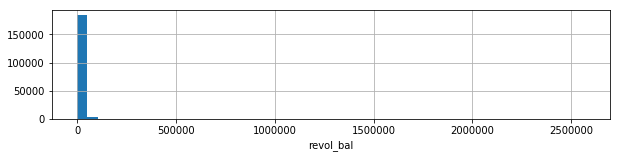

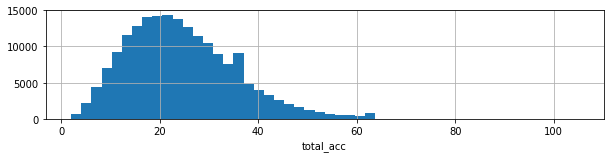

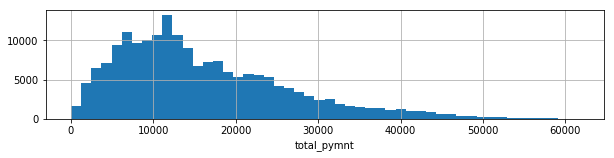

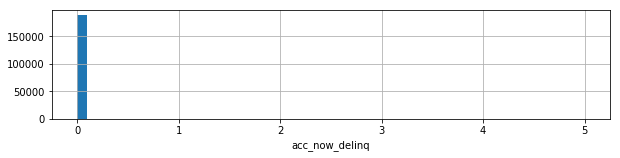

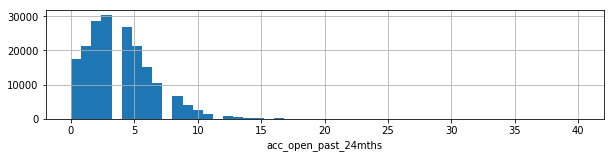

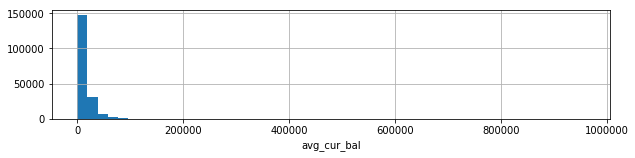

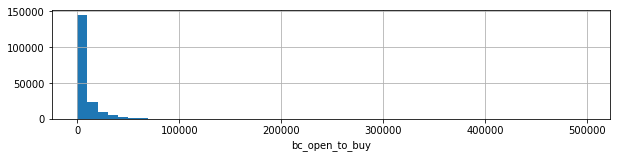

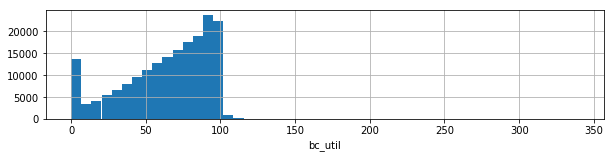

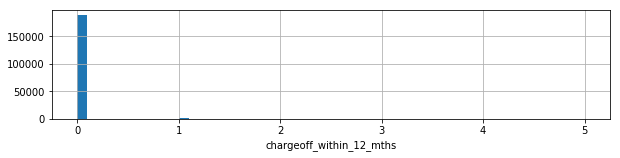

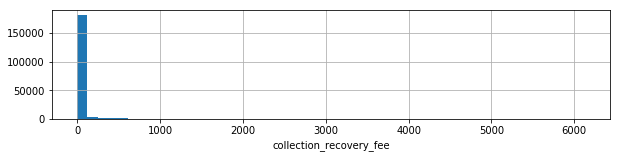

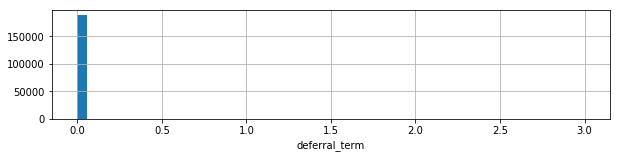

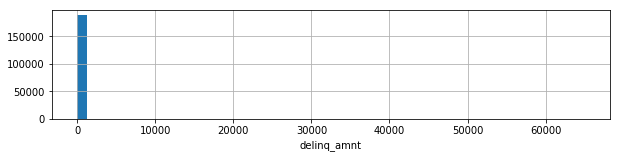

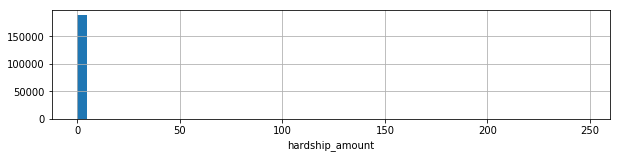

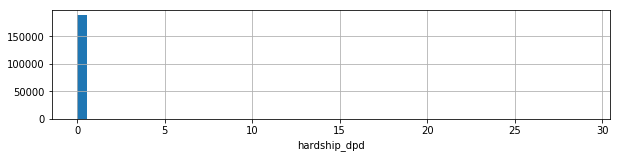

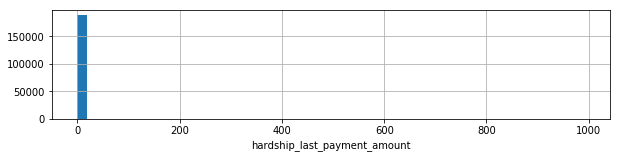

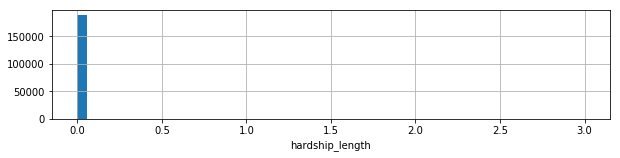

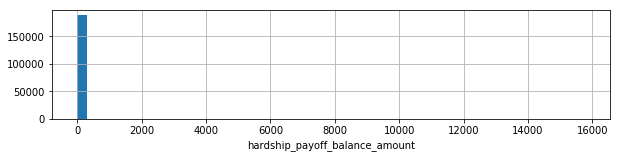

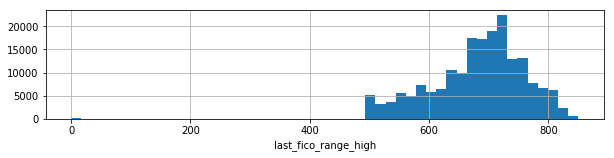

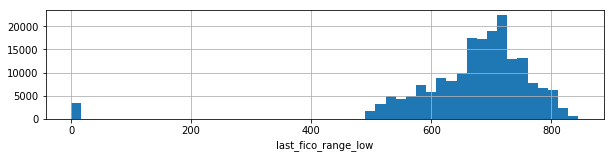

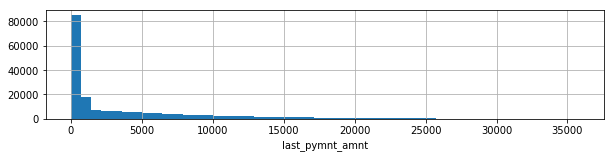

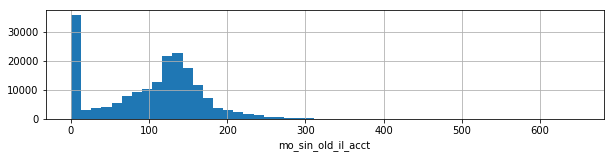

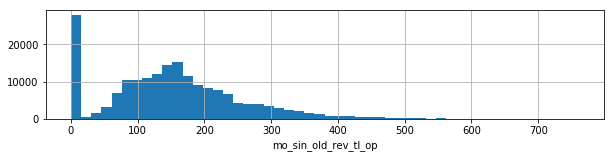

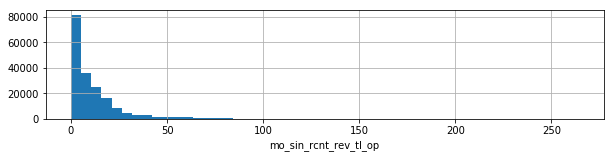

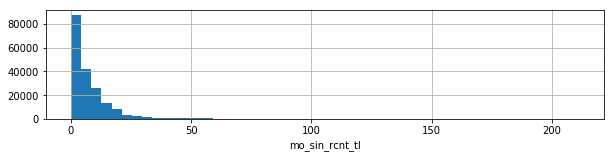

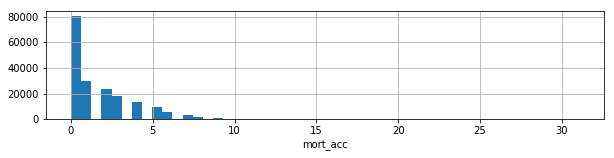

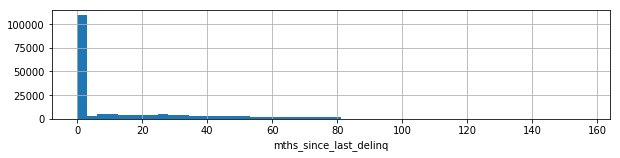

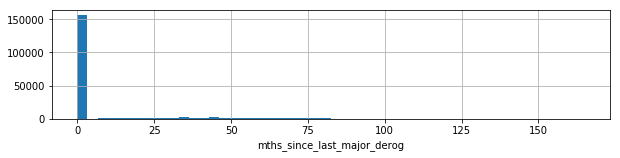

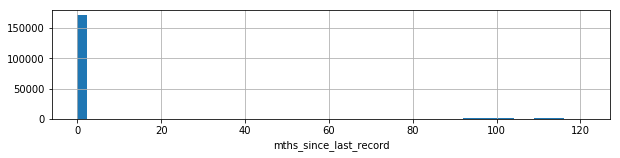

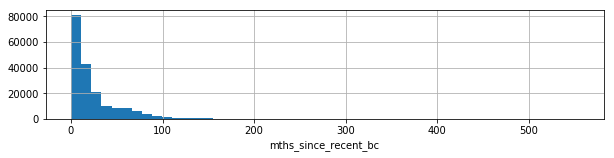

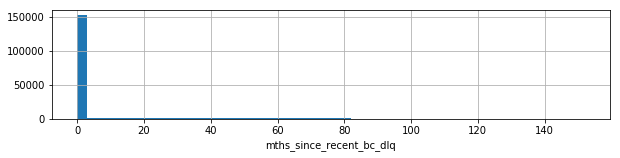

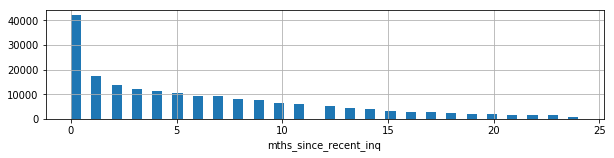

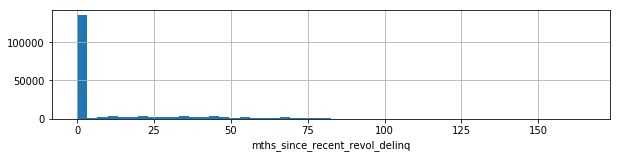

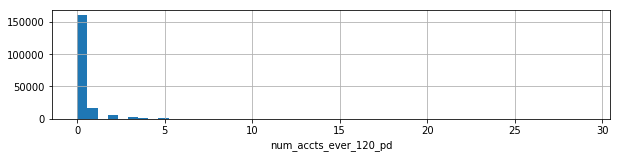

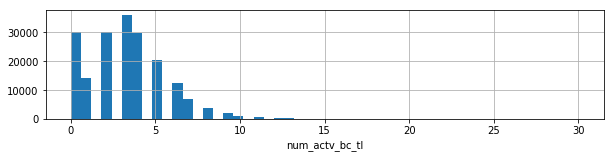

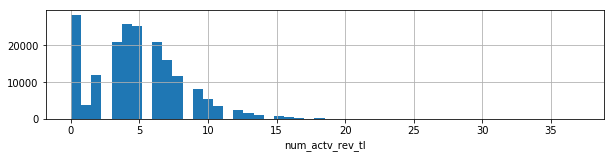

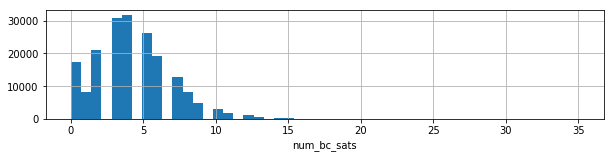

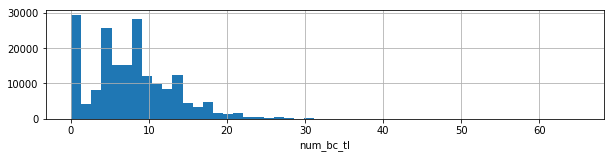

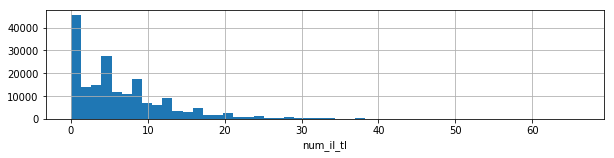

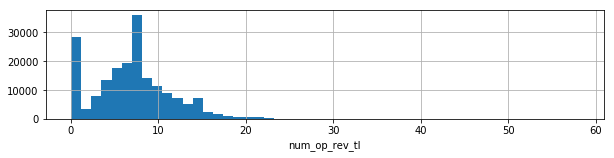

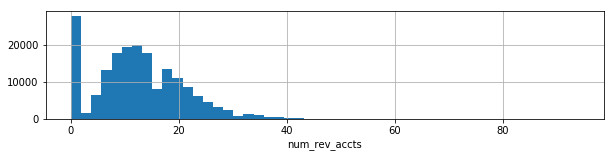

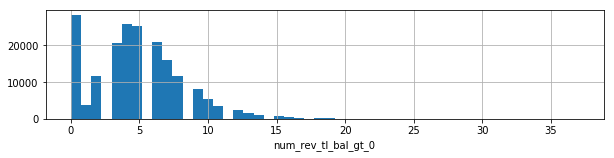

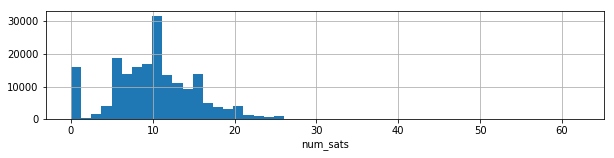

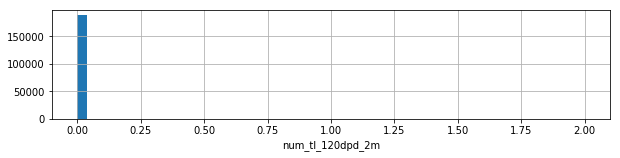

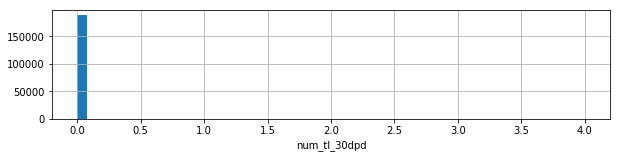

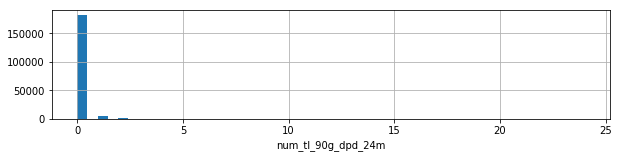

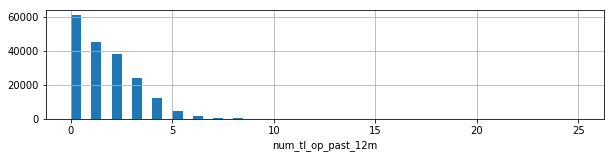

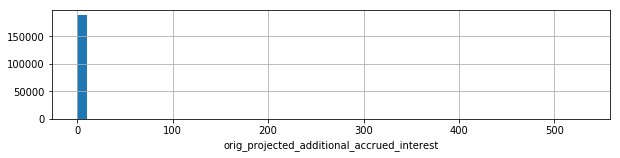

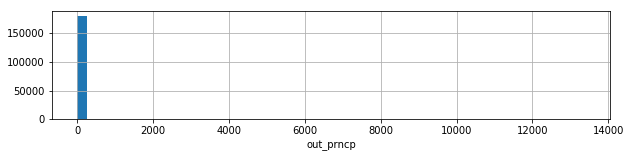

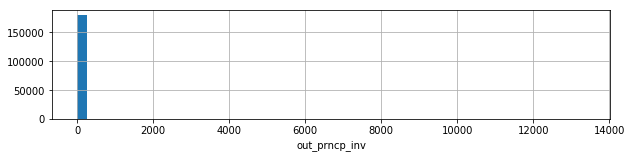

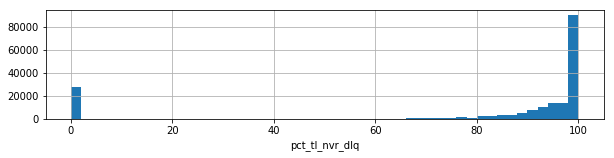

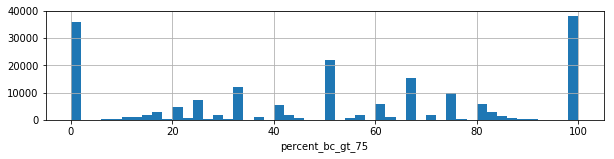

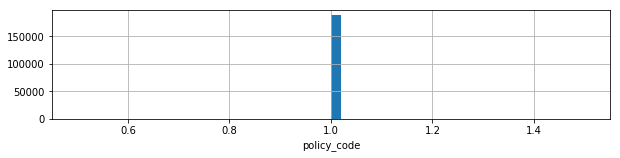

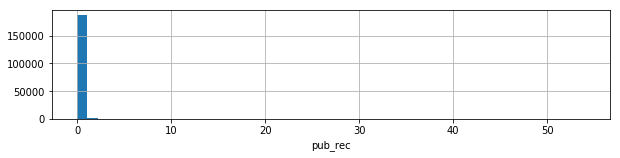

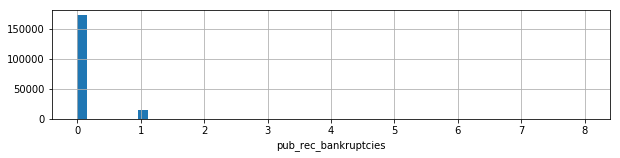

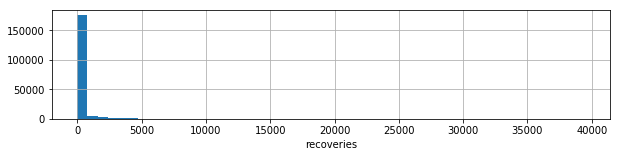

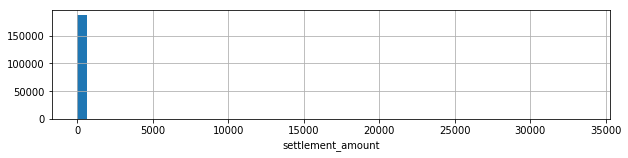

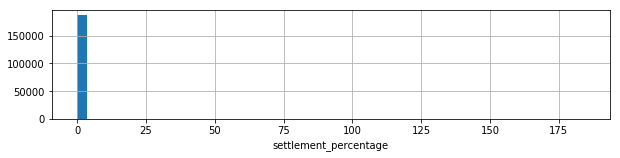

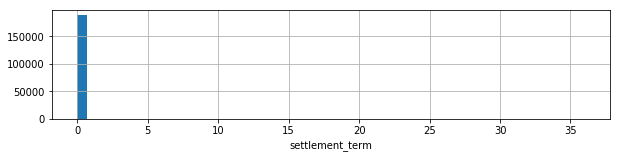

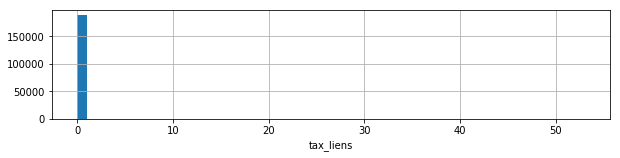

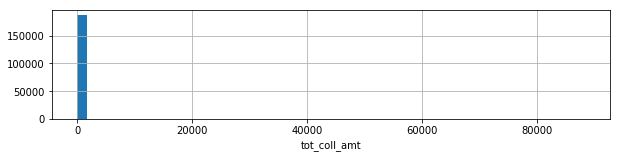

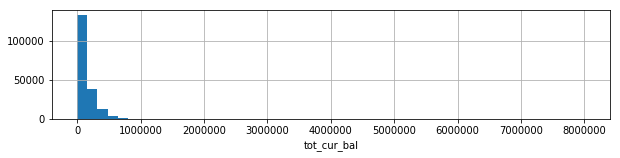

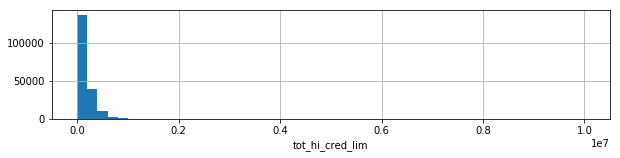

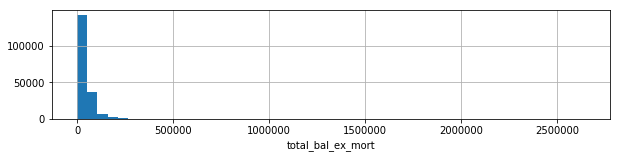

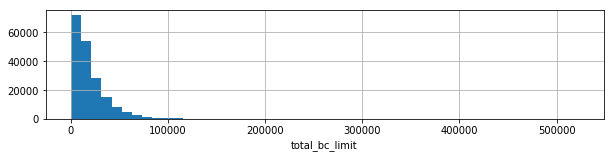

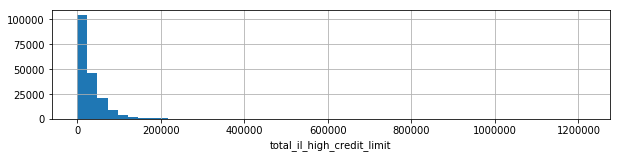

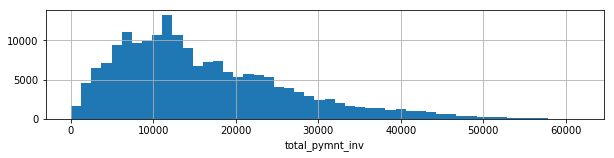

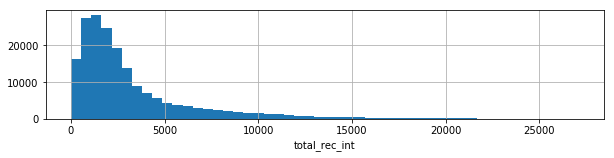

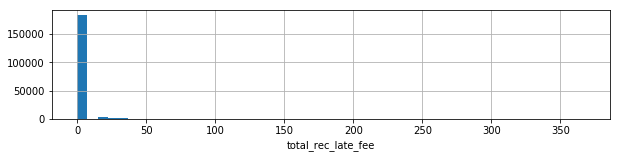

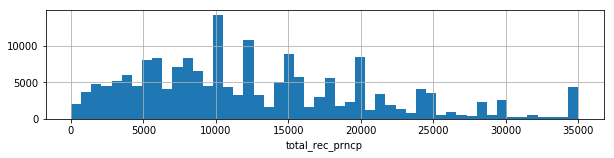

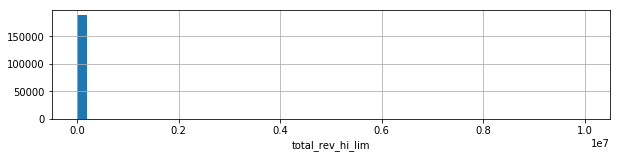

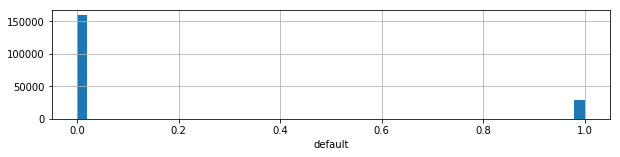

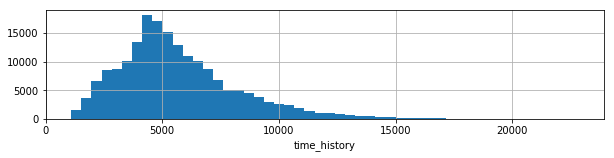

In [63]:
for c in loan_df.columns :
    if(loan_df[c].dtype == 'float64' or loan_df[c].dtype == 'int64') :
        plt.figure(c)
        loan_df[c].hist(bins=50, figsize=(10,2)).set_xlabel(c)
    else :
        print("skipping column {} of type  {}".format(c,loan_df[c].dtype))
        

## The Growth of Lending Club
### Here we use the builtin Brunel Visualization graphics package

Lending club has been expanding over the years in terms of total loan volume and average loan size.

In [36]:
loan_stats = pd.concat([loan_df.groupby('issue_d').mean()['loan_amnt'].to_frame().rename(columns = {'loan_amnt':'loan_average'}), loan_df.groupby('issue_d')['loan_status'].count().to_frame().rename(columns = {'loan_status':'loan_count'})], axis=1)

In [37]:
%brunel data('loan_stats') line x(ISSUE_D) y(loan_average, loan_count) color(#series) tooltip(#all) :: width=900, height=350 

<IPython.core.display.Javascript object>

## Outcome Variable: Loan Status
On the left is the breakdown of all loan status classifications.  On the right is our simple default classification based on our data prep

In [38]:
%brunel data('loan_df') bar x(loan_status) y(#count:linear) color(loan_status) tooltip(#all) | stack polar bar y(#count) color(DEFAULT) percent(#count) tooltip(#all) :: width=1200, height=350 

<IPython.core.display.Javascript object>

## Who Borrowed Most of the Money?

Most of the money in terms of absolute borrowing is borrowed by people from California. For average loan amount per state, Alaska ranks on top.

In [64]:
state_stats = pd.concat([loan_df.groupby('addr_state').sum()['loan_amnt'].to_frame().rename(columns = {'loan_amnt':'state_total'}), loan_df.groupby('addr_state').mean()['loan_amnt'].to_frame().rename(columns = {'loan_amnt':'state_mean'})], axis=1)

In [65]:
%brunel data('state_stats') map color(state_total:[blues, reds]) key(ADDR_STATE) label(ADDR_STATE) tooltip(#all) title("Total Loan Amount by State") style('.header {label-location:left}')| map color(state_mean:[blues, reds]) key(ADDR_STATE) label(ADDR_STATE) tooltip(#all) title("Average Loan Amount by State") style('.header {label-location:left}') :: width=1200, height=350 

<IPython.core.display.Javascript object>

## Default Rate By State

Most states has a default rate under 20%. But the default rate of Nebraska(NE) is 60% since it has 5 loan applications in total and 3 of them are charged off.  

In [67]:
default_rate = loan_df.groupby('addr_state').mean()['default'].to_frame().rename(columns = {'default':'default_rate'})

In [68]:
%brunel data('default_rate') map color(default_rate:[blues, reds]) key(addr_state) label(addr_state) tooltip(#all) title("Default Rate by State")

<IPython.core.display.Javascript object>

## Loan Purpose

Most loans are used for debt consolidation.

In [69]:
purpose_count = loan_df.groupby('purpose')['loan_status'].count().to_frame().rename(columns = {'loan_status':'count'})

In [70]:
%brunel bubble data('purpose_count') color(COUNT:[blues, reds]) size(COUNT) label(PURPOSE) tooltip(#all)

<IPython.core.display.Javascript object>

## DTI(debt-to-income ratio)

A debt-to-income ratio (DTI) is one way lenders (including mortgage lenders) measure an individual's ability to manage monthly payment and repay debts. A low debt-to-income ratio demonstrates a good balance between debt and income. Conversely, a high DTI can signal that an individual has too much debt for the amount of income he or she has. As the plot below shows, borrowers who default on their loans have higher DTI than those who did not default.

In [71]:
# plot_boxplot(loan_sub_kp, ['DTI'])